In [1]:
"""
This code shows an example for using the imported data from a modified
.mat file into a artificial neural network and its training
"""

'\nThis code shows an example for using the imported data from a modified\n.mat file into a artificial neural network and its training\n'

In [52]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [46]:
#this function reads the file 
def read_data(archive, rows, columns):
    data = open(archive, 'r')
    mylist = data.read().split()
    data.close()
    myarray = np.array(mylist).reshape(( rows, columns)).astype(float)
    return myarray
    

In [47]:
data = read_data('../get_data_example/set.txt',72, 12)
X = data[:, [0, 2, 4, 6, 7, 8, 9, 10, 11]]
#print pre_X.shape, data.shape
y  = data[:,1]
#print y.shape

#getting the time vector for plotting purposes
time_stamp = np.zeros(data.shape[0])
for i in xrange(data.shape[0]):
        time_stamp[i] = i*(1.0/60.0)
        
#print X.shape, time_stamp.shape
X = np.hstack((X, time_stamp.reshape((X.shape[0], 1))))
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
t_test = X_test[:,-1]
t_train = X_train[:, -1]
X_train_std = preprocessing.scale(X_train[:,0:-1])
X_test_std = preprocessing.scale(X_test[:, 0:-1])

(72, 10)


In [48]:
 #  Artificial Neural Network
reg = MLPRegressor(hidden_layer_sizes=(40,10),activation='tanh', algorithm='sgd', alpha=0.1, learning_rate='constant',
                   max_iter=1000, random_state=None, verbose=False, warm_start=False,
                   momentum=0.8, tol=10e-8, shuffle=False)

reg.fit(X_train_std, y_train)

MLPRegressor(activation='tanh', algorithm='sgd', alpha=0.1, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, tol=1e-07, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
#Here comes the way to sort out the data according to one the elements of it
test_sorted = np.hstack(
    (t_test.reshape(X_test_std.shape[0], 1), X_test_std, y_test.reshape(X_test_std.shape[0], 1)))
#print vector_sorted.shape, t_test.reshape(X_test_std.shape[0], 1).shape, X_test_std.shape, 
#y_test.reshape(X_test_std.shape[0], 1).shape, '\n'

#print vector_sorted[:, 0]
#print t_test.reshape(X_test_std.shape[0], 1)

    
#print t_test.reshape(X_test_std.shape[0], 1)
test_sorted = test_sorted[np.argsort(test_sorted[:,0])] #modified

train_sorted = np.hstack((t_train.reshape(t_train.shape[0], 1), y_train.reshape(y_train.shape[0], 1) ))
train_sorted = train_sorted[np.argsort(train_sorted[:,0])]
#print train_sorted


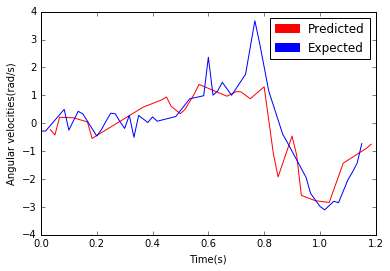

Accuracy: 0.629976322965


In [54]:
%matplotlib inline
#print vector_sorted
results = reg.predict(test_sorted[:, 1:-1])
plt.plot(test_sorted[:, 0], results, c='r') # ( sorted time, results)
plt.plot(train_sorted[:, 0], train_sorted[:,1], c='b') #expected
plt.xlabel("Time(s)")
plt.ylabel("Angular velocities(rad/s)")
red_patch = mpatches.Patch(color='red', label='Predicted')
blue_patch = mpatches.Patch(color='blue', label ='Expected')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

print "Accuracy:", reg.score(X_test_std, y_test)

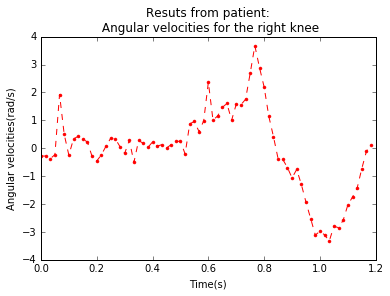

In [12]:
#Full expected result from a patient
%matplotlib inline
plt.plot(time_stamp, y,'--.', c='r')
plt.xlabel("Time(s)")
plt.ylabel("Angular velocities(rad/s)")
plt.title("Resuts from patient:\n"
         " Angular velocities for the right knee")
plt.show()

In [101]:
#example for handling examples of  matrices
x = np.array([[1, 2, 31, 32], [3, 4, 41, 42], [5, 6, 61,62]])

print x, '\n\n'
print np.hstack((x[0,:], x[1,:], x[2,:])), '\n'
print np.hstack((x[0,:], x[1,:], x[2,:])).reshape(3, 4), '\n'
print x[:, 1], '\n'
print x[:, 0].reshape(3,1), '\n'
print x[:, 1:-1]

[[ 1  2 31 32]
 [ 3  4 41 42]
 [ 5  6 61 62]] 


[ 1  2 31 32  3  4 41 42  5  6 61 62] 

[[ 1  2 31 32]
 [ 3  4 41 42]
 [ 5  6 61 62]] 

[2 4 6] 

[[1]
 [3]
 [5]] 

[[ 2 31]
 [ 4 41]
 [ 6 61]]
